In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew, kurtosis, skewnorm
# Data source : https://www.mcxindia.com/market-data/historical-data#

In [4]:
df = pd.read_csv("Data/oil_data.csv")
df.head(5)

,Instrument Type,Date,Segment,Commodity,Traded Contract(Lots),Total Value (Lacs)
0,FUTCOM,01/01/2009,ENERGY,CRUDEOIL,31027,65539.83
1,FUTCOM,02/01/2009,ENERGY,CRUDEOIL,234853,500131.42
2,FUTCOM,03/01/2009,ENERGY,CRUDEOIL,4908,11188.69
3,FUTCOM,05/01/2009,ENERGY,CRUDEOIL,212593,489154.93
4,FUTCOM,06/01/2009,ENERGY,CRUDEOIL,230727,557364.60


In [5]:
print(df.isnull().sum())
print('\n')
print(df.shape)

Instrument Type          0
Date                     0
Segment                  0
Commodity                0
Traded Contract(Lots)    0
Total Value (Lacs)       0
dtype: int64


(4424, 6)


In [6]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst = True)
df = df.sort_values(by='Date')
df.head(5)

,Instrument Type,Date,Segment,Commodity,Traded Contract(Lots),Total Value (Lacs)
0,FUTCOM,2009-01-01,ENERGY,CRUDEOIL,31027,65539.83
1,FUTCOM,2009-01-02,ENERGY,CRUDEOIL,234853,500131.42
2,FUTCOM,2009-01-03,ENERGY,CRUDEOIL,4908,11188.69
3,FUTCOM,2009-01-05,ENERGY,CRUDEOIL,212593,489154.93
4,FUTCOM,2009-01-06,ENERGY,CRUDEOIL,230727,557364.60


1. FUTCOM stands for Future contracts of commodities
2. Total value (₹) = Price (₹) x Traded Contracts (measured in lots)
3. For oil, 1 lot = 100 barrels 
4. ∴ per barrel price = price of 1 lot / 100 

In [7]:
df["Price per Barrel"] = (df["Total Value (Lacs)"] * 100000) / (df["Traded Contract(Lots)"] * 100)
df.head(5)

,Instrument Type,Date,Segment,Commodity,Traded Contract(Lots),Total Value (Lacs),Price per Barrel
0,FUTCOM,2009-01-01,ENERGY,CRUDEOIL,31027,65539.83,2112.348277
1,FUTCOM,2009-01-02,ENERGY,CRUDEOIL,234853,500131.42,2129.550911
2,FUTCOM,2009-01-03,ENERGY,CRUDEOIL,4908,11188.69,2279.684189
3,FUTCOM,2009-01-05,ENERGY,CRUDEOIL,212593,489154.93,2300.898571
4,FUTCOM,2009-01-06,ENERGY,CRUDEOIL,230727,557364.60,2415.688671


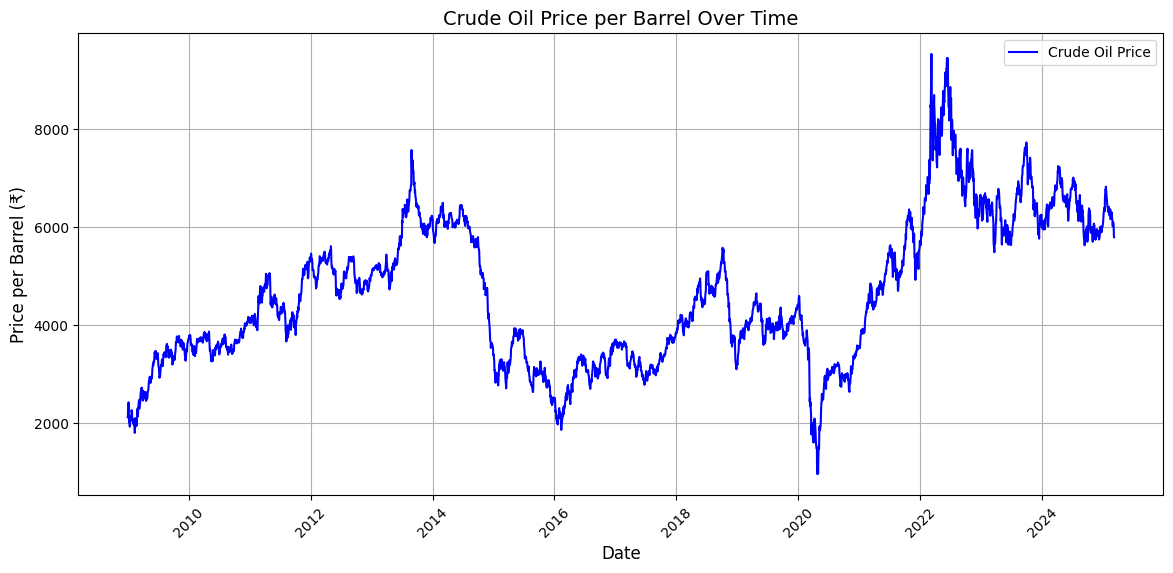

In [8]:
df["Date"] = pd.to_datetime(df["Date"])

df = df.sort_values("Date")

plt.figure(figsize=(14, 6))

sns.lineplot(x=df["Date"], y=df["Price per Barrel"], color="blue", label="Crude Oil Price")

plt.xlabel("Date", fontsize=12)
plt.ylabel("Price per Barrel (₹)", fontsize=12)
plt.title("Crude Oil Price per Barrel Over Time", fontsize=14)
plt.xticks(rotation=45)  
plt.grid(True)
plt.legend()
plt.show()

* 2022 Peak - Russian Invasion of Ukraine.
    EU's NATO backing Ukraine implied russia's stoppage of oil export to EU ==> Supply fall ==> Price increase
* 2020 Trough - Covid 19
    Many sectors such as aviation were shut down ==> Fall in demand ==> Price fall
* 2018 Peak - Geopolitical tensions & supply cuts
    US reimposed sanctions on Iran, reducing its oil exports ==> Supply fall ==> Price increase
* 2014 - 2016 Trough - Oil Price Crash of 2014-2016
    OPEC (led by Saudi Arabia) decided not to cut production, leading to an oversupply. US shale oil boom increased global supply ==> Price decrease

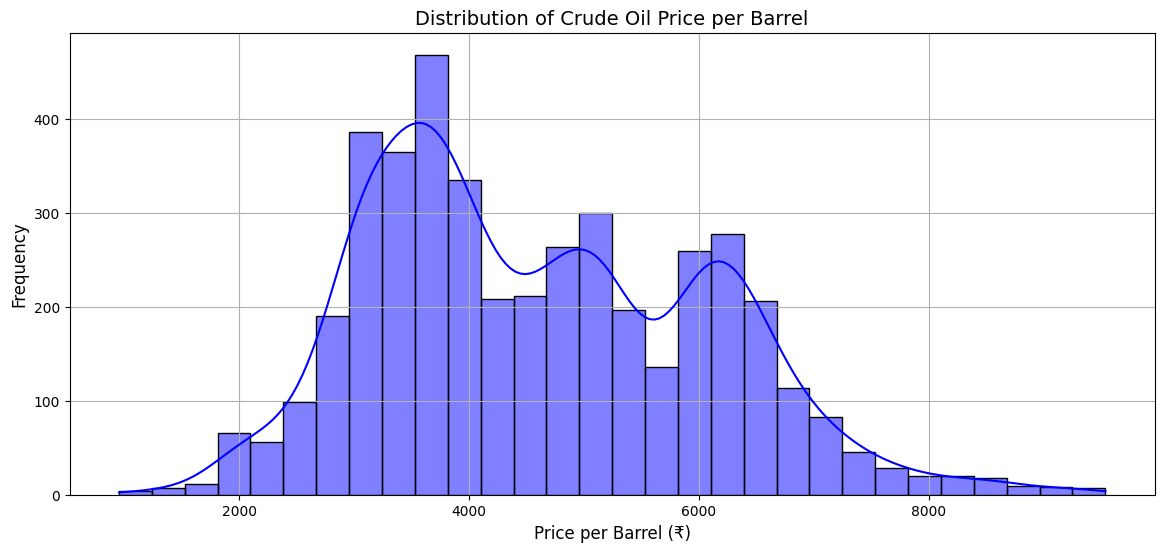

In [9]:
plt.figure(figsize=(14, 6))

sns.histplot(df["Price per Barrel"], kde=True, color="blue", bins=30)  # You can adjust bins as needed

plt.xlabel("Price per Barrel (₹)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Crude Oil Price per Barrel", fontsize=14)
plt.grid(True)
plt.show()


In [10]:
df["Price per Barrel"].mean()

np.float64(4602.576034948103)

In [11]:
df["Price per Barrel"].median()

np.float64(4390.863666831919)

In [12]:
median = df['Price per Barrel'].median()
deviation_price = ( df["Price per Barrel"].tail(1).iloc[0] - median) / median * 100
print(f"Deviation for latest value = {round(deviation_price,2)} %")

Deviation for latest value = 31.83 %


In [13]:
hist_deviations = []
dates = []
for i in range (len(df)):
    median = df["Price per Barrel"].median()
    date = df["Date"].tail(1).iloc[0]
    deviation_price = ( df["Price per Barrel"].tail(1).iloc[0] - median) / median * 100
    hist_deviations.append(round(deviation_price,2))
    dates.append(date)
    df = df.iloc[:-1]

In [14]:
print(len(hist_deviations))
print(len(dates))
dev_min = min(hist_deviations)
dev_max = max(hist_deviations)
print(dev_min, dev_max)

4424
4424
-75.54 140.96


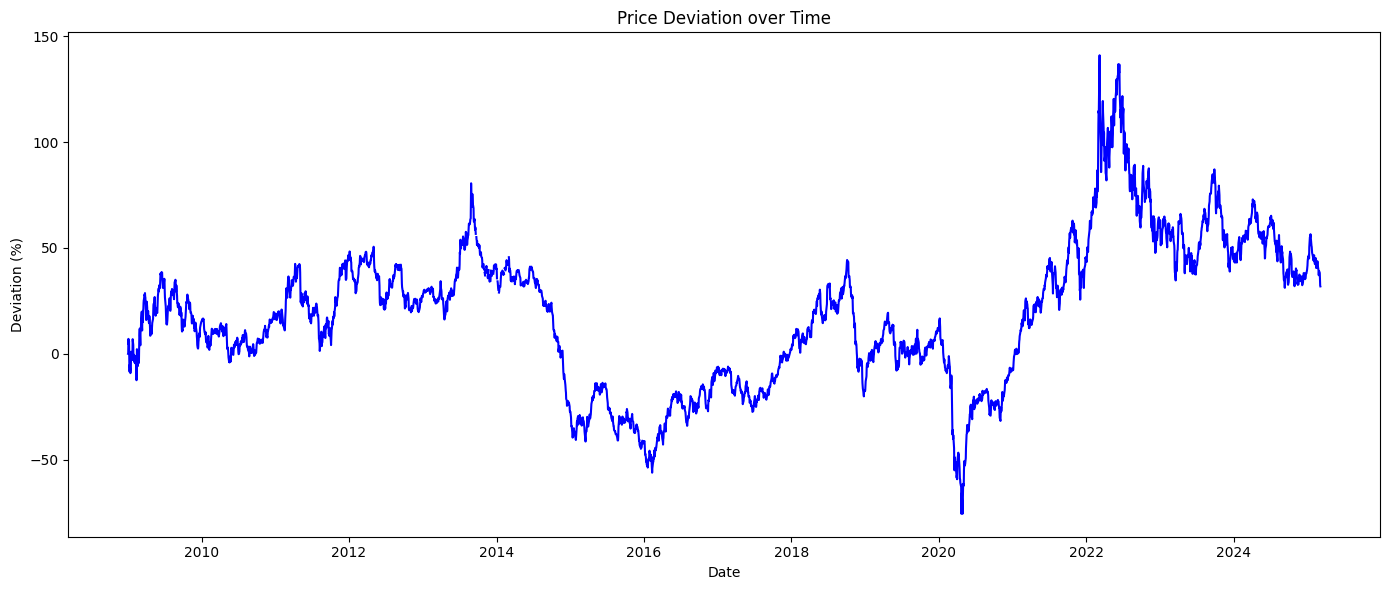

In [15]:
plt.figure(figsize=(14, 6))

median_deviation = np.median(hist_deviations)
plt.axhline(y=median_deviation, color='r', linestyle='--', label=f'Median ({median_deviation:.2f}%)')


plt.plot(dates, hist_deviations,  linestyle='-', color='b')

plt.title('Price Deviation over Time')
plt.xlabel('Date')
plt.ylabel('Deviation (%)')

plt.tight_layout()
plt.show()

In [16]:
pve = 0
nve = 0
for i in hist_deviations:
    if i>0:
        pve += 1 
    else:
        nve += 1
print(pve/len(hist_deviations))

gt25 = 0
lt25 = 0
mid = 0
for i in hist_deviations:
    if i < -0.5:
        lt25+=1
    elif i > 25:
        gt25+=1
    else:
        mid+=1
print(mid/len(hist_deviations), gt25/len(hist_deviations), lt25/len(hist_deviations))

0.7215189873417721
0.2981464737793852 0.43625678119349004 0.26559674502712477


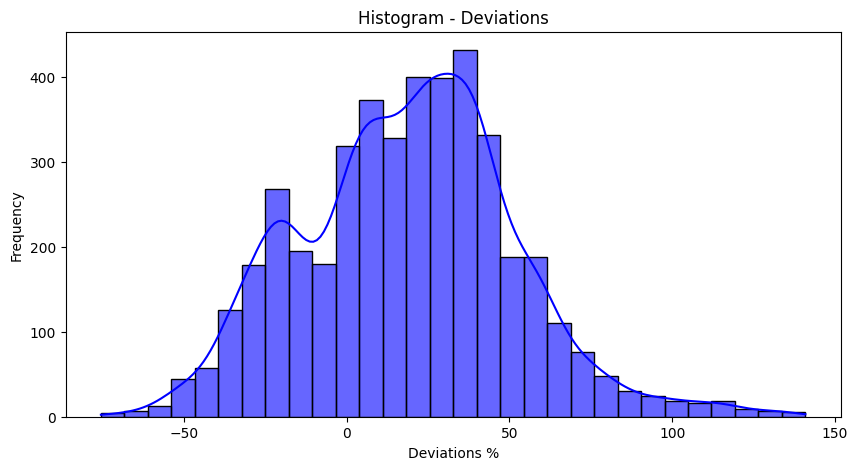

In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(hist_deviations, bins=30, kde=True, color="blue", alpha=0.6)
plt.title("Histogram - Deviations")
plt.xlabel("Deviations %")
plt.ylabel("Frequency")
plt.show()

In [18]:
print(np.any(np.isnan(hist_deviations)))

True


In [19]:
hist_deviations = np.array(hist_deviations)
hist_deviations = hist_deviations[~np.isnan(hist_deviations)]

skewness = skew(hist_deviations)
kurt = kurtosis(hist_deviations)

print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurt:.4f}")

Skewness: 0.2221
Kurtosis: 0.2540


So it is positive tailed

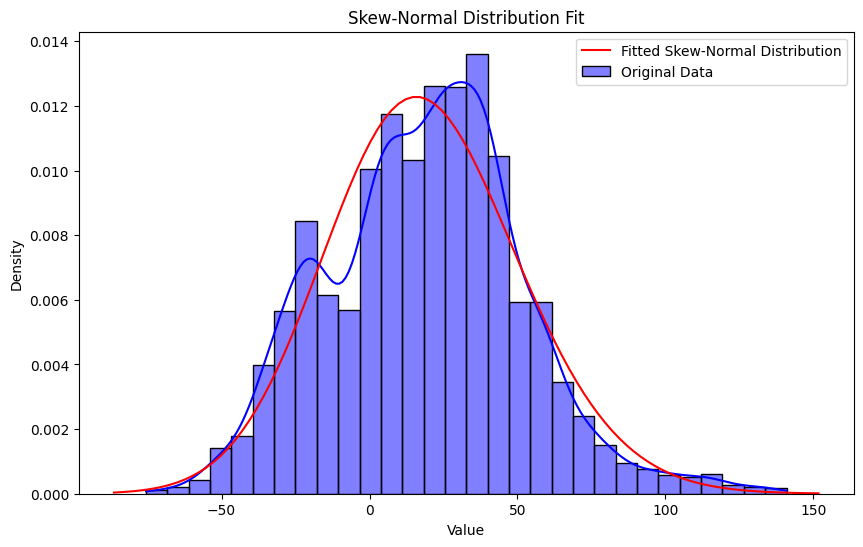

In [20]:
params = skewnorm.fit(hist_deviations)
a, loc, scale = params

plt.figure(figsize=(10, 6))  

sns.histplot(hist_deviations, kde=True, stat="density", color='blue', label='Original Data', bins=30)

xmin, xmax = plt.xlim()  
x = np.linspace(xmin, xmax, 100)
p = skewnorm.pdf(x, a, loc, scale)
plt.plot(x, p, 'r-', label="Fitted Skew-Normal Distribution")

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Skew-Normal Distribution Fit')
plt.legend()

plt.show()

Now it kinda looks like it fits in skew-normal. Though not perfect I think its fine for the trial.

The probability density function (PDF) of a **skew-normal distribution** is :

$$
f(x; \alpha, \mu, \sigma) = \frac{2}{\sigma} \phi \left( \frac{x - \mu}{\sigma} \right) \Phi \left( \alpha \cdot \frac{x - \mu}{\sigma} \right)
$$

Where:

- $ x $ is the variable (deviation).
- $ \mu $ is the mean 
- $ \sigma $ is the standard deviation 
- $ \alpha $ determines the skewness :
    - $ \alpha = 0 $ gives the normal distribution.
    - Positive $ \alpha $ gives right skew.
    - Negative $ \alpha $ gives left skew.
- $ \phi(z) $ is the PDF of the standard normal distribution:
$$
\phi(z) = \frac{1}{\sqrt{2\pi}} e^{-\frac{z^2}{2}}
$$
- $ \Phi(z) $ is the cumulative distribution function (CDF) of the standard normal distribution:
$$
\Phi(z) = \int_{-\infty}^{z} \frac{1}{\sqrt{2\pi}} e^{-\frac{t^2}{2}} dt
$$


In [53]:
current_price = float(input("Enter the current oil level's price"))

x = float((current_price - median ) / median * 100)

cdf = skewnorm.cdf(x, a , loc=loc, scale=scale)

prob_increasing = 1 - cdf

prob_decreasing = cdf

print(f"Deviation from fair value is {x : .2f} %")
print(f"Probability of index increasing: {prob_increasing*100:.2f} %")
print(f"Probability of index decreasing: {prob_decreasing*100:.2f} %")

Deviation from fair value is -18.34 %
Probability of index increasing: 71.39 %
Probability of index decreasing: 28.61 %


In [22]:
def calc_prob(x, a, loc, scale, current_price, current_pe, median_pe):

    cdf = skewnorm.cdf(x, a , loc=loc, scale=scale)

    prob_increasing = round((1 - cdf)*100,2)

    prob_decreasing = round(cdf*100,2)
    
    return prob_increasing, prob_decreasing

In [29]:
df = pd.read_csv("Data/oil_data.csv")
df["Price per Barrel"] = (df["Total Value (Lacs)"] * 100000) / (df["Traded Contract(Lots)"] * 100)

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values(by='Date').reset_index(drop=True)

initial_days = 1000
forecast_horizon = 126

results = []
i = 0
for start in range(initial_days, len(df) - forecast_horizon):

    historical_data = df.iloc[:start]

    median = df["Price per Barrel"].median()

    current_row = df.iloc[start]

    deviation = (current_row["Price per Barrel"] - median) / median * 100

    historical_deviations = (historical_data['Price per Barrel'] - median) / median * 100
    
    historical_deviations = np.array(historical_deviations)
    historical_deviations = historical_deviations[~np.isnan(historical_deviations)]

    a, loc, scale = skewnorm.fit(historical_deviations)

    cdf = skewnorm.cdf(deviation, a, loc=loc, scale=scale)
    prob_increasing = 1 - cdf
    prob_decreasing = cdf

    prediction = 'Up' if prob_increasing > prob_decreasing else 'Down'
    
    future_close = df.iloc[start + forecast_horizon]['Price per Barrel']
    actual_movement = 'Up' if future_close > current_row['Price per Barrel'] else 'Down'
    
    results.append([
        current_row['Date'], prob_increasing, prob_decreasing, prediction, actual_movement
    ])
    print(i)
    i+=1
    

results_df = pd.DataFrame(results, columns=['Date', 'Prob_Up', 'Prob_Down', 'Prediction', 'Actual'])
results_df.to_csv('binary_results.csv', index=False)

print("Backtest complete")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [35]:
df_results = pd.read_csv("binary_results.csv")
df_results

,Date,Prob_Up,Prob_Down,Prediction,Actual
0,2012-04-04,0.035219,0.964781,Down,Up
1,2012-04-05,0.036004,0.963996,Down,Up
2,2012-04-07,0.032773,0.967227,Down,Up
3,2012-04-09,0.039298,0.960702,Down,Up
4,2012-04-10,0.036644,0.963356,Down,Up
...,...,...,...,...,...
3293,2024-09-04,0.173463,0.826537,Down,Up
3294,2024-09-05,0.178458,0.821542,Down,Up
3295,2024-09-06,0.191278,0.808722,Down,Up
3296,2024-09-09,0.196914,0.803086,Down,Up


In [39]:
success = 0
fail = 0 
total = len(df_results)

for i in range(total):
    if df_results["Prediction"].iloc[i] == df_results["Actual"].iloc[i]:
        success += 1
    else:
        fail += 1

print(f"Success rate: {success / total:.2f}")

Success rate: 0.59


In [47]:
median = historical_data['Price per Barrel'].median()

historical_deviations = (historical_data['Price per Barrel'] - median) / median * 100

df["dev"] = historical_deviations

df["dev"] = historical_deviations.reindex(df.index)

In [52]:
df

,Instrument Type,Date,Segment,Commodity,Traded Contract(Lots),Total Value (Lacs),Price per Barrel,dev
0,FUTCOM,2009-01-01,ENERGY,CRUDEOIL,31027,65539.83,2112.348277,-50.715473
1,FUTCOM,2009-01-02,ENERGY,CRUDEOIL,234853,500131.42,2129.550911,-50.314108
2,FUTCOM,2009-01-03,ENERGY,CRUDEOIL,4908,11188.69,2279.684189,-46.811254
3,FUTCOM,2009-01-05,ENERGY,CRUDEOIL,212593,489154.93,2300.898571,-46.316287
4,FUTCOM,2009-01-06,ENERGY,CRUDEOIL,230727,557364.60,2415.688671,-43.638047
...,...,...,...,...,...,...,...,...
4419,FUTCOM,2025-02-28,ENERGY,CRUDEOIL,10139,61845.58,6099.771181,NaN
4420,FUTCOM,2025-03-03,ENERGY,CRUDEOIL,19287,116985.98,6065.535335,NaN
4421,FUTCOM,2025-03-04,ENERGY,CRUDEOIL,22858,135123.45,5911.429259,NaN
4422,FUTCOM,2025-03-05,ENERGY,CRUDEOIL,32737,189928.66,5801.651343,NaN


R² Score: 1.00
Mean Squared Error: 0.00


C:\Users\sanja\AppData\Local\Temp\ipykernel_23144\52434068.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', color="red")


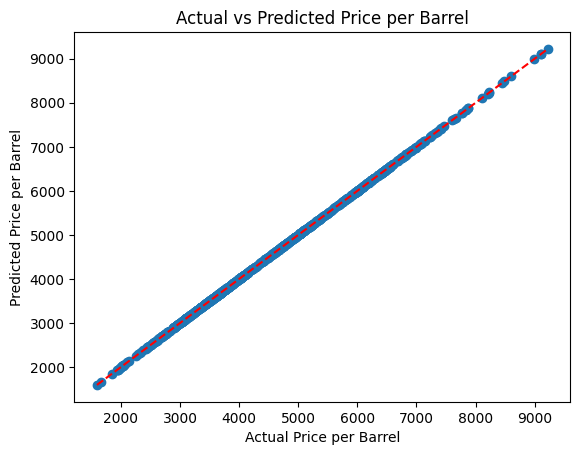

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df_clean = df.dropna(subset=["dev", "Price per Barrel"])

X = df_clean[["dev"]]
y = df_clean["Price per Barrel"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', color="red")
plt.xlabel("Actual Price per Barrel")
plt.ylabel("Predicted Price per Barrel")
plt.title("Actual vs Predicted Price per Barrel")
plt.show()
